# Week 5 - 30th Aug, 2023

## Step 1

Implement PCA without standardisation and find eigenvalues, eigenvectors, and PCA values and confirm last week's manual calculation through this.

In [ ]:
print('todo')

## Step 2

Analyse the input file and create a suitable CSV file with applied operations of PCA and obtain PCA reduced points. Submit the code along with obtained eigenvalues and eigenvectors within the generated input and output CSVs.

In [2]:
import pandas as pd
import matplotlib
import numpy as np
from sklearn.decomposition import PCA

input_df = pd.read_csv('cust2.csv')
input_df.head(5)

,Cust_no,Ec-products,Stationary,fashion_prod,other_shopping,Savings
0,1,0.9,3.010,9.10,11.1,-2.00
1,2,5.5,7.023,0.23,9.5,-9.27
2,3,3.3,3.822,1.92,0.0,1.92
3,4,0.2,3.310,18.20,12.7,5.50
4,5,1.5,2.112,0.10,6.5,-8.38


We drop the `Cust_no` using the Brute Force method and drop the `Savings` column since it has the least correlation with any single column of the dataset ("odd one out")

,Ec-products,Stationary,fashion_prod,other_shopping
0,0.9,3.010,9.10,11.1
1,5.5,7.023,0.23,9.5
2,3.3,3.822,1.92,0.0
3,0.2,3.310,18.20,12.7
4,1.5,2.112,0.10,6.5


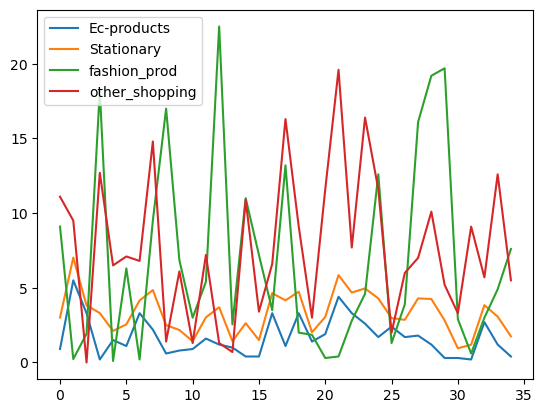

In [3]:
filtered_df = input_df.drop(['Cust_no', 'Savings'], axis=1)
filtered_df.plot()
filtered_df.head(5)

Applying PCA on the filtered data:

In [4]:
pca = PCA()
pca.fit(filtered_df)

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

[round(value, 4) for value in eigenvalues]

[43.239, 24.3154, 2.4486, 0.0098]

We can see that the first 3 values in `eigenvalues` store most of the data; hence, we can remove one dimension.

In [5]:
total = sum(eigenvalues)
sum_of_3 = sum(eigenvalues[:3])
percent = sum_of_3 / total * 100

print(f'{round(percent, 2)}%')

99.99%


In [6]:
pca = PCA(n_components=3)
pca.fit(filtered_df)

eigenvectors = pca.components_
eigenvectors

array([[-0.09438785,  0.00720288,  0.99439958,  0.04699507],
       [ 0.07932931,  0.16559956, -0.04008717,  0.98217955],
       [ 0.67141936,  0.71762928,  0.06668509, -0.1725032 ]])

,Ec-products,Stationary,fashion_prod,other_shopping
0,-0.817143,-0.292343,2.20,3.408571
1,3.782857,3.720657,-6.67,1.808571
2,1.582857,0.519657,-4.98,-7.691429
3,-1.517143,0.007657,11.30,5.008571
4,-0.217143,-1.190343,-6.80,-1.191429


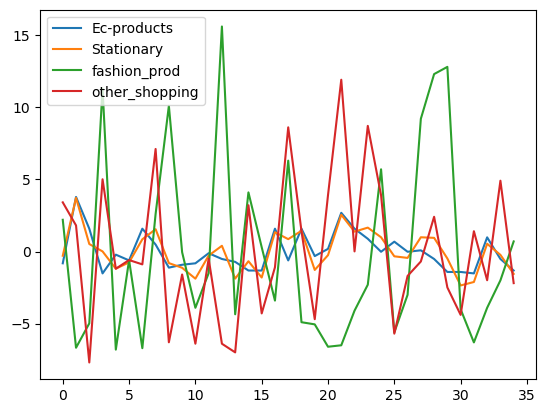

In [7]:
mean = filtered_df.mean()
mean_adjusted_df = (filtered_df - mean)
mean_adjusted_df.plot()
mean_adjusted_df.head(5)

Doing a cross product of our mean adjusted data with our eigenvectors gives us the data of our PC values.

,PC1,PC2,PC3
0,2.422888,3.146402,-1.199722
1,-6.877908,2.959954,4.453162
2,-5.459229,-7.143108,2.430386
3,11.615348,4.347246,-1.123597
4,-6.805987,-1.111950,-1.247952


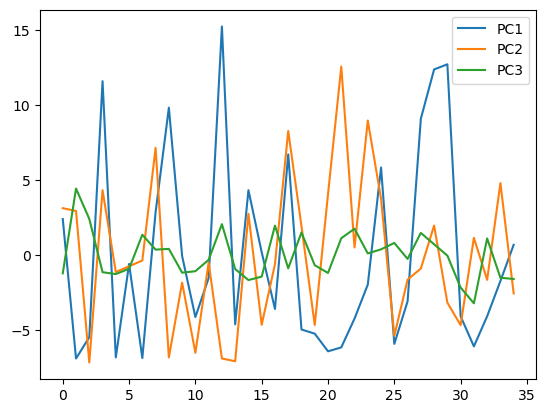

In [8]:
pca_df = mean_adjusted_df.dot(eigenvectors.transpose())
pca_df = pca_df.rename(columns={0: 'PC1', 1: 'PC2', 2: 'PC3'})
pca_df.plot()
pca_df.head(5)

Verifying our calculations by using `pca.transform` which gives us the exact same values we calculated!

,PC1,PC2,PC3
0,2.422888,3.146402,-1.199722
1,-6.877908,2.959954,4.453162
2,-5.459229,-7.143108,2.430386
3,11.615348,4.347246,-1.123597
4,-6.805987,-1.111950,-1.247952


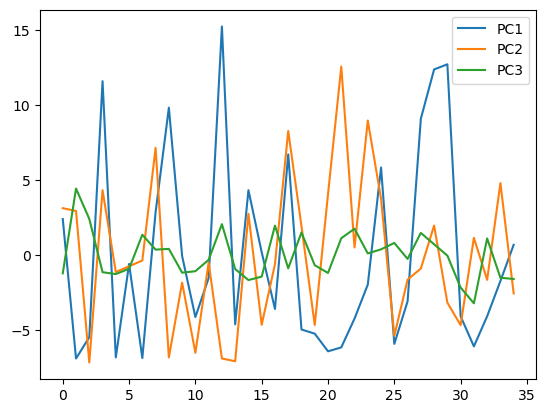

In [9]:
pca_data = pca.transform(filtered_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df.plot()
pca_df.head(5)

Compiling input, PCA, and output columns into one dataframe for calculating the correlations:

In [10]:
output_df = pd.concat([filtered_df, pca_df, input_df['Savings']], axis=1).applymap(lambda value: round(value, 4))
output_df.head(5)

,Ec-products,Stationary,fashion_prod,other_shopping,PC1,PC2,PC3,Savings
0,0.9,3.010,9.10,11.1,2.4229,3.1464,-1.1997,-2.00
1,5.5,7.023,0.23,9.5,-6.8779,2.9600,4.4532,-9.27
2,3.3,3.822,1.92,0.0,-5.4592,-7.1431,2.4304,1.92
3,0.2,3.310,18.20,12.7,11.6153,4.3472,-1.1236,5.50
4,1.5,2.112,0.10,6.5,-6.8060,-1.1120,-1.2480,-8.38


Calculating the correlation matrix to visualise the PC data and make deductions.

In [11]:
correlation_matrix = output_df.corr()
correlation_matrix.applymap(lambda value: round(value, 4))

,Ec-products,Stationary,fashion_prod,other_shopping,PC1,PC2,PC3,Savings
Ec-products,1.0000,0.8206,-0.4794,0.2276,-0.4836,0.3048,0.8186,-0.5469
Stationary,0.8206,1.0000,0.0291,0.5423,0.0341,0.5871,0.8074,-0.3280
fashion_prod,-0.4794,0.0291,1.0000,0.0326,0.9994,-0.0302,0.0160,0.7628
other_shopping,0.2276,0.5423,0.0326,1.0000,0.0636,0.9964,-0.0555,-0.5998
PC1,-0.4836,0.0341,0.9994,0.0636,1.0000,0.0000,0.0000,0.7434
PC2,0.3048,0.5871,-0.0302,0.9964,0.0000,1.0000,0.0000,-0.6478
PC3,0.8186,0.8074,0.0160,-0.0555,0.0000,0.0000,1.0000,0.0236
Savings,-0.5469,-0.3280,0.7628,-0.5998,0.7434,-0.6478,0.0236,1.0000


### Analysis

From the above correlation matrix, we observe that:
- PC1 captures **99.9%** of `fashion_prod`
- PC2 captures **99.6%** of `other_shopping`
- PC3 captures **81.86%** of `Ec-products` and **80.74%** of `Stationary`

Our dimensionality has been reduced from 4 to 3.

In [12]:
output_df.to_csv('output.csv', index=False)